In [1]:
- Linha/Serviço (Percurso, km, seccionamentos[itinerários], tabela de horários)
- Tipo de carro (Categoria, Cama Motorista)

Restrições da Legislação
###•	Motorista deve ter um intervalo de 11 horas entre jornadas
###•	Motorista deve ter um intervalo de 30 min a cada 4h intrajornada
•	No 7º dia de trabalho deve receber uma Folga de 36h 
###•	Carga horária de trabalho de 7:20h por jornada 
•	No máx 2h extras por viagem
•	Itinerarios

Cidades Base


Construir um cenário que as rotas vão sendo realizadas e eu tenha os locais que o motorista para para descansar





In [15]:
from datetime import datetime, date

data_ini = datetime.strptime(input('Data Início:'), '%d/%m/%Y').date()
data_fim = datetime.strptime(input('Data Fim:'), '%d/%m/%Y').date()

linha = input('Rota:')

data = date(2024, 5, 2)

#02/05/2024
#22/05/2024
#01034


#SEGUNDA É 0 E DOMINGO É 6 NO MÉTODO .weekday() 

Data Início:02/05/2024
Data Fim:22/05/2024
Rota:01034


In [16]:
from datetime import timedelta

print(f'DATA INÍCIO {data_ini}')
print(f'DATA FIM {data_fim}')

list_datas = []
while data_ini <= data_fim:
    list_datas.append(data_ini)
    data_ini += timedelta(days=1)

print(list_datas)


#PEGANDO OS DADOS DE TODAS AS LINHAS




DATA INÍCIO 2024-05-02
DATA FIM 2024-05-22
[datetime.date(2024, 5, 2), datetime.date(2024, 5, 3), datetime.date(2024, 5, 4), datetime.date(2024, 5, 5), datetime.date(2024, 5, 6), datetime.date(2024, 5, 7), datetime.date(2024, 5, 8), datetime.date(2024, 5, 9), datetime.date(2024, 5, 10), datetime.date(2024, 5, 11), datetime.date(2024, 5, 12), datetime.date(2024, 5, 13), datetime.date(2024, 5, 14), datetime.date(2024, 5, 15), datetime.date(2024, 5, 16), datetime.date(2024, 5, 17), datetime.date(2024, 5, 18), datetime.date(2024, 5, 19), datetime.date(2024, 5, 20), datetime.date(2024, 5, 21), datetime.date(2024, 5, 22)]


In [17]:
############ FILTRANDO OS DADOS DAS LINHAS DE ACORDO COM A LINHA E DATAS SELECIONADAS ############

def menor_date(list_date):
    
    menor_date = date(3000,12,12)
    for dt in list_date:
        if dt < menor_date:
            menor_date = dt

    return menor_date


def time_by_min(time):
    return (time.hour*60)+time.minute


def diferenca_minutos_entre_times(objeto1, objeto2):
    minutos_objeto1 = time_by_min(objeto1)
    minutos_objeto2 = time_by_min(objeto2)

    diferenca_minutos = minutos_objeto2 - minutos_objeto1

    if diferenca_minutos < 0:
        diferenca_minutos += 24 * 60  

    return diferenca_minutos


############ TRAZENDO OS DADOS DAS ROTAS ############
import json

with open(r'C:\Users\Pat-50785\PycharmProjects\Gestao-De-Escala\documentos\projeto_linhas_horarios.json', 'r') as json_rotas:
    linhas_dados = json.load(json_rotas)


#TENTANDO DESCOBRIR A DATA DE SAÍDA MAIS PRÓXIMA
dates_seccionament = []
for dat in list_datas:
    if dat.weekday() in linhas_dados[linha]['FREQUÊNCIA']:
        dates_seccionament.append(dat)

#FILTRANDO DE VERDADE
for direc, value_aux in linhas_dados[linha]['PERCURSO'].items():
    

    print('-'*30+direc+'-'*30)
    new_dat_inic = datetime.strptime(f"{menor_date(dates_seccionament)} {[values['HORÁRIO CHEGADA'][-8:] for key, values in value_aux.items()][0]}", '%Y-%m-%d %H:%M:%S')
    cont = time_by_min(new_dat_inic.time())

    date_aux = new_dat_inic.date()
    last_date = new_dat_inic.time()
    
    for cod_secc, value in value_aux.items():
        
        print('-'*10+linhas_dados[linha]['PERCURSO'][direc][cod_secc]['SECCIONAMENTO']+'-'*10)
        data_secc = datetime.strptime(linhas_dados[linha]['PERCURSO'][direc][cod_secc]['HORÁRIO CHEGADA'][-8:], "%H:%M:%S")

        dif_min = diferenca_minutos_entre_times(last_date, data_secc)

        last_date = data_secc
        #SEPARANDO AS HORAS E MINUTOS DA DIFERENÇA
        cont += dif_min
        
        if cont >= 1440:
            date_aux += timedelta(days=1)
            cont -= 1440
        
        #SUBESCREVENDO AS DATAS E HORAS COM O FORMATO CORRETO
        retorno_hrs_chegada = f'{date_aux} {data_secc.hour}:{data_secc.minute}:00'

        linhas_dados[linha]['PERCURSO'][direc][cod_secc]['HORÁRIO CHEGADA'] = retorno_hrs_chegada

        #TRANTANDO O DADO DE TEMPO PARADO PARA SOMAR JUNTO A HORAS CHEGADA
        parada_time = datetime.strptime(linhas_dados[linha]['PERCURSO'][direc][cod_secc]['TEMPO DE PARADA'], '%H:%M:%S')
        parada_timedelta = timedelta(hours=parada_time.hour, minutes=parada_time.minute, seconds=parada_time.second)

        linhas_dados[linha]['PERCURSO'][direc][cod_secc]['HORÁRIO SAIDA'] = str(datetime.strptime(retorno_hrs_chegada, "%Y-%m-%d %H:%M:%S") + parada_timedelta)

        print(f'HORAS CHEGADA {retorno_hrs_chegada}')
        print(f'PARADA {parada_time}')
        print(f'HORA FINAL {datetime.strptime(retorno_hrs_chegada, "%Y-%m-%d %H:%M:%S") + parada_timedelta}')        
        

------------------------------Volta------------------------------
----------Abonari----------
HORAS CHEGADA 2024-05-03 12:55:00
PARADA 1900-01-01 00:05:00
HORA FINAL 2024-05-03 13:00:00
----------Km 200 (Br 174) Am----------
HORAS CHEGADA 2024-05-03 13:40:00
PARADA 1900-01-01 00:00:00
HORA FINAL 2024-05-03 13:40:00
----------Km 180 (Br 174) Am----------
HORAS CHEGADA 2024-05-03 13:50:00
PARADA 1900-01-01 00:00:00
HORA FINAL 2024-05-03 13:50:00
----------Rumo Certo (Br 174) Am----------
HORAS CHEGADA 2024-05-03 13:55:00
PARADA 1900-01-01 00:05:00
HORA FINAL 2024-05-03 14:00:00
----------Km 160 (Br 174) Am----------
HORAS CHEGADA 2024-05-03 14:5:00
PARADA 1900-01-01 00:00:00
HORA FINAL 2024-05-03 14:05:00
----------Canoas----------
HORAS CHEGADA 2024-05-03 14:10:00
PARADA 1900-01-01 00:05:00
HORA FINAL 2024-05-03 14:15:00
----------Km 140 (Br 174) Am----------
HORAS CHEGADA 2024-05-03 14:20:00
PARADA 1900-01-01 00:00:00
HORA FINAL 2024-05-03 14:20:00
----------Km 120 (Br 174) Am---------

In [41]:
linhas_func = {}

for lin in linhas_dados:
    
    secc_by_linha = linhas_dados[lin]['FREQUÊNCIA']
    
    merge_dates = [dat for dat in list_datas if dat.weekday() in secc_by_linha]
    if len(merge_dates) > 0: 
        #for sent in linhas_dados[lin]['PERCURSO']:
        #    for value in dict(linhas_dados[lin]['PERCURSO'][sent]).values():
                
        linhas_func[linhas_dados[lin]['LINHA']] = {sent: [(values['HORÁRIO CHEGADA'], values['HORÁRIO SAIDA']) for values in dict(linhas_dados[lin]['PERCURSO'][sent]).values()] for sent in linhas_dados[lin]['PERCURSO']}



{'Rio Branco x Vilhena': {'Volta': [('2024-04-17 19:25:00',
    '2024-04-17 19:25:00'),
   ('2024-04-17 19:30:00', '2024-04-17 20:00:00'),
   ('2024-04-17 23:20:00', '2024-04-17 23:25:00'),
   ('2024-04-18 01:44:00', '2024-04-18 01:45:00'),
   ('2024-04-18 04:30:00', '2024-04-18 05:00:00'),
   ('2024-04-18 07:45:00', '2024-04-18 08:00:00'),
   ('2024-04-18 09:20:00', '2024-04-18 09:30:00'),
   ('2024-04-18 10:20:00', '2024-04-18 10:25:00'),
   ('2024-04-18 11:15:00', '2024-04-18 11:45:00'),
   ('2024-04-18 12:25:00', '2024-04-18 12:35:00'),
   ('2024-04-18 13:45:00', '2024-04-18 14:00:00'),
   ('2024-04-18 14:50:00', '2024-04-18 15:00:00'),
   ('2024-04-18 17:30:00', '2024-04-18 17:45:00'),
   ('2024-04-18 17:50:00', '2024-04-18 18:05:00')],
  'Ida': [('2024-04-18 07:55:00', '2024-04-18 07:55:00'),
   ('2024-04-18 08:00:00', '2024-04-18 08:30:00'),
   ('2024-04-18 11:00:00', '2024-04-18 11:40:00'),
   ('2024-04-18 12:30:00', '2024-04-18 12:40:00'),
   ('2024-04-18 13:50:00', '2024-04-1

In [30]:
############ TRAZENDO OS DADOS DOS MOTORISTAS ############

import pandas as pd

planil = pd.read_excel('ProjetoMotoristas.xlsx', sheet_name='listaMotoristas')

columns_plan = [column for column in planil]


listMotoristas = []

for idx_mot in range(len(planil['ANO'])):
    aux_list = [planil[colm][idx_mot] for colm in columns_plan]
    
    listMotoristas.append(aux_list)


#FILTRANDO SOMENTE OS MOTORISTAS INTERSTADUAIS E INTERMUNICIPAIS
list_motoritas = [x for x in listMotoristas if str(x[4]).strip() in ('MOTORISTA INTERESTADUAL', 'MOTORISTA INTERMUNICIPAL')]


display(list_motoritas)


[[2024,
  9,
  2332,
  'CLEITON BERNARDO DE LIMA',
  'MOTORISTA INTERESTADUAL',
  'RODOVIÁRIO',
  'CEEM BOA VISTA - MANAUS',
  'BOA VISTA',
  'OPERACIONAL',
  Timestamp('2021-08-16 00:00:00'),
  1],
 [2024,
  9,
  3014,
  'CLODOILDO DE MOURA GOMES',
  'MOTORISTA INTERESTADUAL',
  'RODOVIÁRIO',
  'CEEM BOA VISTA - MANAUS',
  'BOA VISTA',
  'OPERACIONAL',
  Timestamp('2023-06-21 00:00:00'),
  1],
 [2024,
  9,
  3065,
  'DANIEL PINTO DA SILVA',
  'MOTORISTA INTERESTADUAL',
  'RODOVIÁRIO',
  'CEEM BOA VISTA - MANAUS',
  'BOA VISTA',
  'OPERACIONAL',
  Timestamp('2023-10-26 00:00:00'),
  1],
 [2024,
  9,
  3027,
  'EDUARDO ESMAEL NASCIMENTO',
  'MOTORISTA INTERESTADUAL',
  'RODOVIÁRIO',
  'CEEM BOA VISTA - MANAUS',
  'BOA VISTA',
  'OPERACIONAL',
  Timestamp('2023-08-01 00:00:00'),
  1],
 [2024,
  9,
  3054,
  'FABIANO CAMPOS SILVA',
  'MOTORISTA INTERESTADUAL',
  'RODOVIÁRIO',
  'CEEM BOA VISTA - MANAUS',
  'BOA VISTA',
  'OPERACIONAL',
  Timestamp('2023-10-04 00:00:00'),
  1],
 [2024,
  9

In [31]:

dic_aux = {}
for direc in linhas_dados[linha]['PERCURSO'].keys():
    aux = {
        'Cidades': [str(linhas_dados[linha]['PERCURSO'][direc][id_secc]['SECCIONAMENTO']).strip() for id_secc in linhas_dados[linha]['PERCURSO'][direc]],
        'Horarios': [str(linhas_dados[linha]['PERCURSO'][direc][id_secc]['HORÁRIO CHEGADA']).strip() for id_secc in linhas_dados[linha]['PERCURSO'][direc]]
    }

    dic_aux[f'{linha} // {str(linhas_dados[linha]["LINHA"]).strip()} ({direc.upper()})'] = aux


with open('dados_for_calculo.json', 'w') as dfc:
    json.dump(dic_aux, dfc, indent=4)
    

display(list_motoritas)

[[2024,
  9,
  2332,
  'CLEITON BERNARDO DE LIMA',
  'MOTORISTA INTERESTADUAL',
  'RODOVIÁRIO',
  'CEEM BOA VISTA - MANAUS',
  'BOA VISTA',
  'OPERACIONAL',
  Timestamp('2021-08-16 00:00:00'),
  1],
 [2024,
  9,
  3014,
  'CLODOILDO DE MOURA GOMES',
  'MOTORISTA INTERESTADUAL',
  'RODOVIÁRIO',
  'CEEM BOA VISTA - MANAUS',
  'BOA VISTA',
  'OPERACIONAL',
  Timestamp('2023-06-21 00:00:00'),
  1],
 [2024,
  9,
  3065,
  'DANIEL PINTO DA SILVA',
  'MOTORISTA INTERESTADUAL',
  'RODOVIÁRIO',
  'CEEM BOA VISTA - MANAUS',
  'BOA VISTA',
  'OPERACIONAL',
  Timestamp('2023-10-26 00:00:00'),
  1],
 [2024,
  9,
  3027,
  'EDUARDO ESMAEL NASCIMENTO',
  'MOTORISTA INTERESTADUAL',
  'RODOVIÁRIO',
  'CEEM BOA VISTA - MANAUS',
  'BOA VISTA',
  'OPERACIONAL',
  Timestamp('2023-08-01 00:00:00'),
  1],
 [2024,
  9,
  3054,
  'FABIANO CAMPOS SILVA',
  'MOTORISTA INTERESTADUAL',
  'RODOVIÁRIO',
  'CEEM BOA VISTA - MANAUS',
  'BOA VISTA',
  'OPERACIONAL',
  Timestamp('2023-10-04 00:00:00'),
  1],
 [2024,
  9

In [37]:
from datetime import datetime, timedelta

import random

capMotorista = 7.34


#linhas_de_onibus = {
#    'Linha 1': {
#        'Cidades': ['Cidade A', 'Cidade B', 'Cidade C', 'Cidade D', 'Cidade E', 'Cidade F', 'Cidade G', 'Cidade H', 'Cidade I', 'Cidade J'],
#        'Horarios': ['04/09/2023 08:00', '04/09/2023 09:30', '04/09/2023 11:15', '04/09/2023 13:45', '04/09/2023 15:30', '04/09/2023 17:00', '04/09/2023 18:45', '04/09/2023 20:15', '04/09/2023 22:00', '04/09/2023 23:30'],
#        'Distancias': [20, 30, 45, 60, 75, 90, 105, 120, 135, 150]
#    },
#    'Linha 2': {
#        'Cidades': ['Cidade X', 'Cidade Y', 'Cidade Z', 'Cidade W', 'Cidade V', 'Cidade U', 'Cidade T', 'Cidade S', 'Cidade R', 'Cidade Q'],
#        'Horarios': ['04/09/2023 07:30', '04/09/2023 10:00', '04/09/2023 12:30', '04/09/2023 14:15', '04/09/2023 16:45', '04/09/2023 19:00', '04/09/2023 21:30', '04/09/2023 23:15', '05/09/2023 01:00', '05/09/2023 02:30'],
#        'Distancias': [25, 35, 50, 65, 80, 95, 110, 125, 140, 155]
#    },
#    'Linha 3': {
#        'Cidades': ['Cidade M', 'Cidade N', 'Cidade O', 'Cidade P', 'Cidade Q', 'Cidade R', 'Cidade S', 'Cidade T', 'Cidade U', 'Cidade V'],
#        'Horarios': ['04/09/2023 08:15', '04/09/2023 09:45', '04/09/2023 11:30', '04/09/2023 13:00', '04/09/2023 15:00', '04/09/2023 16:30', '04/09/2023 18:15', '04/09/2023 20:00', '04/09/2023 22:15', '04/09/2023 23:45'],
#        'Distancias': [30, 40, 60, 80, 100, 120, 140, 160, 180, 200]
#    },
#    'Linha 4': {
#        'Cidades': ['Cidade G', 'Cidade H', 'Cidade I', 'Cidade J', 'Cidade A', 'Cidade B', 'Cidade C', 'Cidade D', 'Cidade E', 'Cidade F'],
#        'Horarios': ['04/09/2023 07:00', '04/09/2023 08:45', '04/09/2023 10:30', '04/09/2023 12:00', '04/09/2023 14:30', '04/09/2023 16:15', '04/09/2023 18:00', '04/09/2023 19:45', '04/09/2023 21:30', '04/09/2023 23:00'],
#        'Distancias': [45, 60, 75, 90, 20, 30, 45, 60, 75, 90]
#    },
#    'Linha 5': {
#        'Cidades': ['Cidade E', 'Cidade D', 'Cidade C', 'Cidade B', 'Cidade A', 'Cidade J', 'Cidade I', 'Cidade H', 'Cidade G', 'Cidade F'],
#        'Horarios': ['04/09/2023 07:30', '04/09/2023 09:15', '04/09/2023 11:00', '04/09/2023 12:30', '04/09/2023 14:45', '04/09/2023 16:30', '04/09/2023 18:15', '04/09/2023 19:45', '04/09/2023 21:30', '04/09/2023 23:15'],
#        'Distancias': [35, 50, 65, 80, 95, 90, 75, 60, 45, 30]
#    }
#}
#



motoristas_disponiveis = ["motorista " + f"{x+1}" for x in range(50)]

#print(motoristas_disponiveis)

print()

EscalaGeral = {}

for k in dic_aux.keys():
    print(k,"______________________________________")
    ContHora = 0
    
    motorista = random.choice(motoristas_disponiveis)
    motoristas_disponiveis.remove(motorista)
    #HORA INÍCIO MOTORISTA
    hrInMot = linhas_de_onibus[k]['Horarios'][0]
    
    #CIDADE INÍCIO MOTORISTA
    cidInMot = linhas_de_onibus[k]['Cidades'][0]
    
    print(f'PRIMEIRA CIDADE É {cidInMot}')
    motoristas_disponiveis = list(set([str(x[3]).strip() for x in list_motoritas if ]))
    #motoristas_disponiveis = [x for x in list_motoritas if str(x[7]).strip().upper() == str(cidInMot).strip().upper()]
    #print(motoristas_disponiveis)
    
    
    motorista = random.choice(motoristas_disponiveis)
    motoristas_disponiveis.remove(motorista)
    
    escala = {}
    
    dadosViagem = [[],[],[]]
    trechoMot = []
    hrPartHrCheg = []
    
    print(f'HORA 1 {hora1}')
    ### Construção inicial da Escala ###
    for i in range(len(dic_aux[k]["Horarios"])):
        hora1 = datetime.strptime(hrInMot,  "%Y-%m-%d %H:%M:%S")
        hora2 = datetime.strptime(dic_aux[k]["Horarios"][i],  "%Y-%m-%d %H:%M:%S")
        diferenca = hora2 - hora1
        diferenca_em_minutos = (diferenca.seconds // 60)/60   # Minutos
        
        print(f'HORA 2 {hora2}')
        
        
        #### Restição de intervalos de 30 min a cada 4h intrajornada ###
        
        if diferenca_em_minutos >= 4 and not "Intervalo" in escala[motorista][0]:
            
            trechoMot.append("Intervalo")
            hrPartHrCheg.append([datetime.strptime(dic_aux[k]["Horarios"][i-1],  "%Y-%m-%d %H:%M:%S"),datetime.strptime(dic_aux[k]["Horarios"][i-1],  "%Y-%m-%d %H:%M:%S")])
            dadosViagem[0] = trechoMot
            dadosViagem[1] = hrPartHrCheg
            escala[motorista] = dadosViagem
            
            
            
        #### Restição Capacidade de Carga horária de trabalho de 7:20h por jornada ###           
        if diferenca_em_minutos <= capMotorista:
            print(diferenca_em_minutos)
            print(motorista, dadosViagem)
            
            if i == 0:
                horaAtual = hora1
            else:
                horaAtual = datetime.strptime(dic_aux[k]["Horarios"][i-1], "%Y-%m-%d %H:%M:%S")


            trechoMot.append(dic_aux[k]["Cidades"][i])
            hrPartHrCheg.append([horaAtual,hora2])
            dadosViagem[0] = trechoMot
            dadosViagem[1] = hrPartHrCheg
            escala[motorista] = dadosViagem
        
        else:
            if i == 0:
                horaAtual = hora1
            else:
                horaAtual = datetime.strptime(dic_aux[k]["Horarios"][i-1],  "%Y-%m-%d %H:%M:%S")
                                 
            trechoMot.append(dic_aux[k]["Cidades"][i])
            hrPartHrCheg.append([horaAtual,hora2])
            dadosViagem[0] = trechoMot
            dadosViagem[1] = hrPartHrCheg
            
            
            ### Intervalo Entre Jornadas   ###
            IntervaloEntre = [hrPartHrCheg[-1][1], hrPartHrCheg[-1][1]+ timedelta(hours=11)]
            dadosViagem[2] = IntervaloEntre
            escala[motorista] = dadosViagem
            
            ### Troca de Motorista  ###

            
            motorista = random.choice(motoristas_disponiveis)
            motoristas_disponiveis.remove(motorista)
            hrInMot = dic_aux[k]["Horarios"][i]
            
            dadosViagem = [[],[],[]]
            trechoMot = []
            hrPartHrCheg = []
            dadosViagem[0] = trechoMot
            dadosViagem[1] = hrPartHrCheg
            escala[motorista] = dadosViagem
            
    EscalaGeral[k] = escala

            
        #print(linhas_de_onibus[k]["Cidades"][i],linhas_de_onibus[k]["Horarios"][i],diferenca_em_minutos)
##print(EscalaGeral)



#for i in EscalaGeral:
#    print("")
#    print(i.keys())
    


display(EscalaGeral)
#for x,y in EscalaGeral["Cascavel-RioBranco"].items():
#    print(x)
#    print(y[2])


01034 // Abonari x Manaus (VOLTA) ______________________________________
PRIMEIRA CIDADE É Abonari
HORA 1 2024-05-03 12:55:00
HORA 2 2024-05-03 12:55:00
0.0
JAIR BORGES SALDANHA [[], [], []]
HORA 2 2024-05-03 13:40:00
0.75
JAIR BORGES SALDANHA [['Abonari'], [[datetime.datetime(2024, 5, 3, 12, 55), datetime.datetime(2024, 5, 3, 12, 55)]], []]
HORA 2 2024-05-03 13:50:00
0.9166666666666666
JAIR BORGES SALDANHA [['Abonari', 'Km 200 (Br 174) Am'], [[datetime.datetime(2024, 5, 3, 12, 55), datetime.datetime(2024, 5, 3, 12, 55)], [datetime.datetime(2024, 5, 3, 12, 55), datetime.datetime(2024, 5, 3, 13, 40)]], []]
HORA 2 2024-05-03 13:55:00
1.0
JAIR BORGES SALDANHA [['Abonari', 'Km 200 (Br 174) Am', 'Km 180 (Br 174) Am'], [[datetime.datetime(2024, 5, 3, 12, 55), datetime.datetime(2024, 5, 3, 12, 55)], [datetime.datetime(2024, 5, 3, 12, 55), datetime.datetime(2024, 5, 3, 13, 40)], [datetime.datetime(2024, 5, 3, 13, 40), datetime.datetime(2024, 5, 3, 13, 50)]], []]
HORA 2 2024-05-03 14:05:00
1.1

KeyError: '01034 // Abonari x Manaus (IDA)'

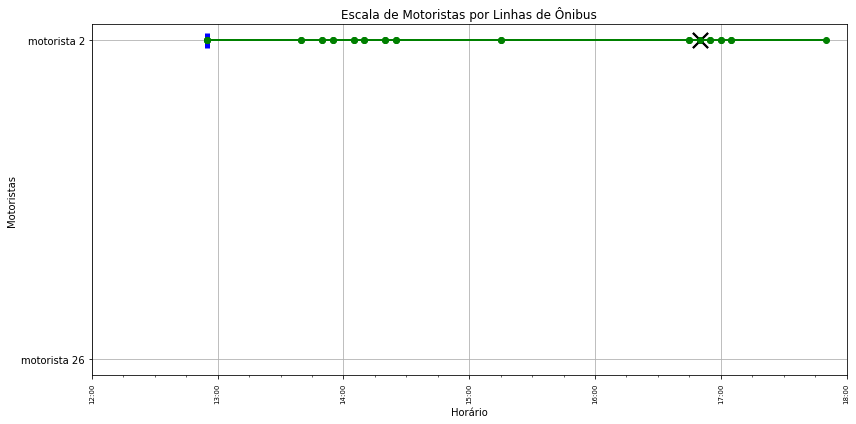

In [29]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

def plot_schedule(data):

    fig, ax = plt.subplots(figsize=(12, 6))

    linhas = list(data.keys())
    y_positions = {}  # Dicionário para mapear motoristas para posições no eixo Y

    for i, linha in enumerate(linhas):
        motoristas = data[linha]

        for motorista, viagens in motoristas.items():
            if motorista not in y_positions:
                y_positions[motorista] = len(y_positions) + 1

            y = y_positions[motorista]  # Posição vertical do motorista

            cidades = viagens[0]
            horarios = viagens[1]
            IntervaloEntre = viagens[2]
            
            # Plotar intervalos se não estiverem vazios
            if IntervaloEntre:
                ax.plot(IntervaloEntre, [y, y], marker='|', c="r", markersize=15, mew=5)

            if cidades and horarios:
                for j in range(len(cidades)):
                    cidade = cidades[j]

                    if j < len(horarios):
                        inicio = horarios[j][0]
                        fim = horarios[j][1]
                        
                        # Calcula a duração da viagem em horas
                        duracao_horas = (fim - inicio).total_seconds() / 3600

                        if j == 0:
                            ax.plot([inicio], [y], marker='|', c="b", markersize=15, mew=5)

                        if cidade == "Intervalo":
                            ax.plot([inicio, fim], [y, y], marker='x', c="k", markersize=15, mew=2)
                        else:
                            ax.plot([inicio, fim], [y, y], marker='o', lw=2, c="g")
                            

    ax.set_yticks(range(1, len(y_positions) + 1))
    ax.set_yticklabels(list(y_positions.keys()))
    ax.invert_yaxis()
    ax.set_xlabel('Horário')
    ax.set_ylabel('Motoristas')
    ax.set_title('Escala de Motoristas por Linhas de Ônibus')

    data_min = datetime(2024, 5, 3, 12, 0)  
    data_max = datetime(2024, 5, 3, 18, 0)  
    ax.set_xlim(data_min, data_max)

    horas = mdates.HourLocator(interval=1)
    minutos = mdates.MinuteLocator(interval=15)
    ax.xaxis.set_major_locator(horas)
    ax.xaxis.set_minor_locator(minutos)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

    plt.xticks(rotation=90, fontsize=7)  
    plt.tight_layout()
    plt.grid()
    plt.show()

plot_schedule(EscalaGeral)
